# Koth Stats

In [4]:
import random

import pandas as pd
import matplotlib.pyplot as plt

import koth_stats.stats as ks

from common import display_figure, generate_random_game

## Examples

### Classic random game

Create dummy data

In [6]:
players_g1, transitions_df_g1 = generate_random_game(nb_players=4, nb_transitions=8)
transitions_df_g1

,Name,Duration
0,Player D,62
1,Player D,90
2,Player D,22
3,Player D,34
4,Player A,62
5,Player B,98
6,Player B,77
7,Player D,10


Initialize the ``KothStatService``

In [7]:
ks_service = ks.KothStatService(players_g1, transitions_df_g1)

Use it to display stats and the score.

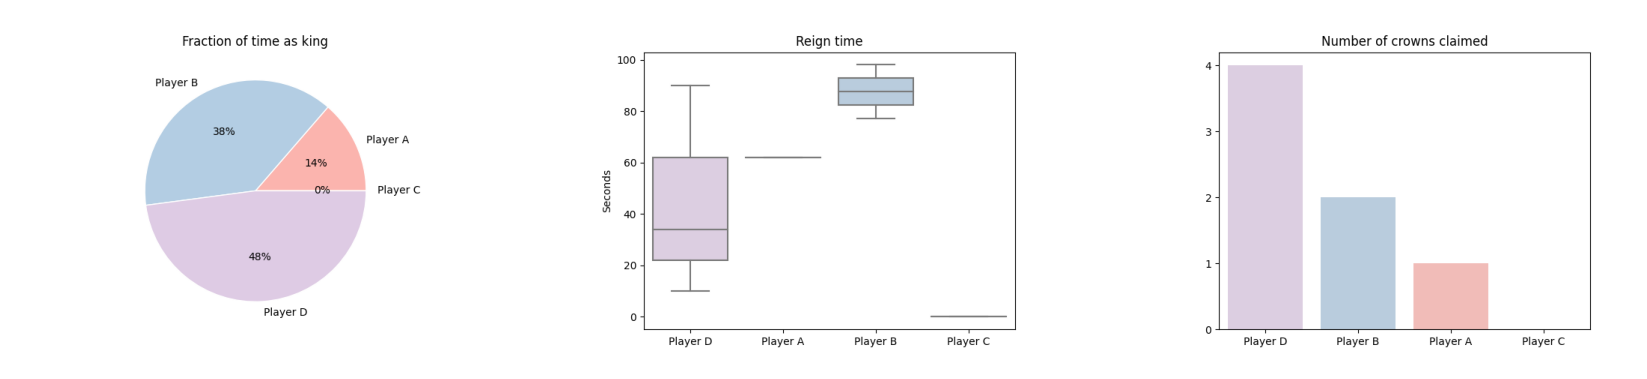

In [8]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(21, 7)
display_figure(ks_service.total_reign_time.plot(include_title=True), ax=axs[0])
display_figure(ks_service.reign_time.plot(include_title=True), ax=axs[1])
display_figure(ks_service.crowns_claimed.plot(include_title=True), ax=axs[2])

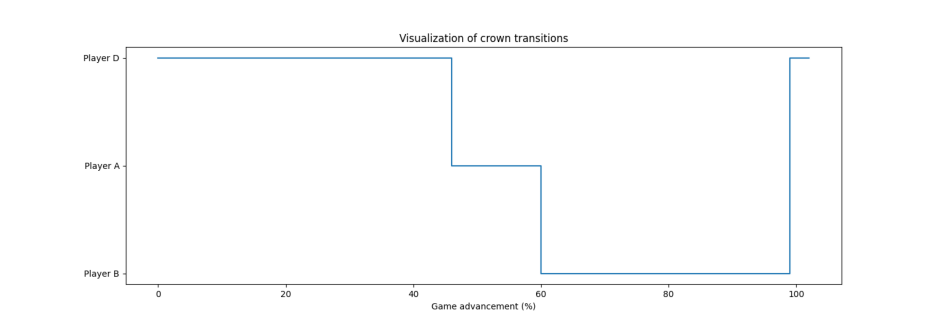

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 4)
display_figure(ks_service.graph_visualization.plot(include_title=True), ax=ax)

,Points
Name,
Player D,149
Player B,103
Player A,34
Player C,0


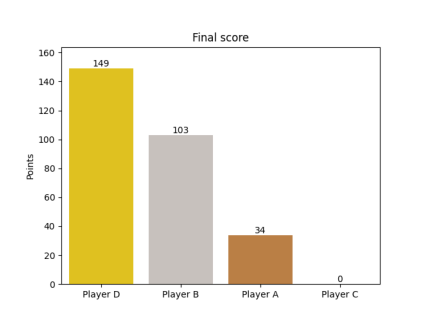

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 4)
display_figure(ks_service.points_plot(include_title=True), ax=ax)

ks_service.points_df()